# Data Analysis Practice for EDA ( Exploring Data Analysis)

본격적인 모델링및 예측에 앞서 내가 분석하고자하는 dataset의 features, target의 양상파악, 분포파악, 관계도 파악을 통해 
결측값및 outlier들에 대한 전처리를 하고 궁극적으론 예측률을 높일 수 있는 insight를 찾아낸다. 

In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rsi_5182=pd.read_pickle('C:\\Users\\limsun\\PRACTICE\\lego\\machine learining test sample.pickle')

In [133]:
rsi_5182.head(3)

,Group ID,Si,Fe,Cu,Mn,Mg,Cr,Ti,Na,Ca,...,Bi,Al,Pb,Sn,B,Cd,V,Zr,Ga,Sb
0,MR0002,0.10834,0.25197,0.03229,0.22466,2.27050,0.09849,0.01502,0.00001,0.00005,...,-0.00033,96.94504,0.00186,0.00042,0.00003,-0.00001,0.00690,0.00111,0.01342,-0.00175
1,MR0002,0.10925,0.25434,0.03250,0.22216,2.27156,0.09666,0.01498,0.00000,0.00005,...,-0.00028,96.94466,0.00185,0.00042,0.00002,-0.00001,0.00681,0.00110,0.01352,-0.00152
2,MR0002,0.11497,0.28729,0.03481,0.22543,1.79650,0.09678,0.01793,0.00001,0.00013,...,-0.00039,97.36143,0.00291,0.00051,0.00003,-0.00002,0.00735,0.00120,0.01308,-0.00053


In [141]:
pre_invest.groupby('target')[['Si','Zr','Cr','Cu','Sb']].mean()

,Si,Zr,Cr,Cu,Sb
target,,,,,
2,0.140593,0.001392,0.081452,0.054361,0.001314
12,0.129075,0.001693,0.040622,0.076308,0.001049
17,0.089588,0.001026,0.036041,0.062392,-0.001405
30,0.141588,0.002376,0.032169,0.085944,0.001642


In [41]:
rsi_5182.columns

Index(['Group ID', 'Si', 'Fe', 'Cu', 'Mn', 'Mg', 'Cr', 'Ti', 'Na', 'Ca', 'Li',
       'Zn', 'Be', 'Ni', 'Bi', 'Al', 'Pb', 'Sn', 'B', 'Cd', 'V', 'Zr', 'Ga',
       'Sb'],
      dtype='object')

#### data set 의 크기 파악 --> shape 

#### data set 의 value type 확인 --> info 

#### data set 의 결측값 파악 --> insull().sum()

#### 결측값 채우기 혹은 지우기 . dropna(), fillna()

In [40]:
print(rsi_5182.shape)
rsi_5182.info()
rsi_5182.isnull().sum()
sb_mean=rsi_5182['Sb'].astype(float).dropna().mean()
rsi_5182['Sb']=rsi_5182['Sb'].fillna(sb_mean)

(594, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 24 columns):
Group ID    594 non-null object
Si          594 non-null object
Fe          594 non-null object
Cu          594 non-null object
Mn          594 non-null object
Mg          594 non-null object
Cr          594 non-null object
Ti          594 non-null object
Na          594 non-null object
Ca          594 non-null object
Li          594 non-null object
Zn          594 non-null object
Be          594 non-null object
Ni          594 non-null object
Bi          594 non-null object
Al          594 non-null object
Pb          594 non-null object
Sn          594 non-null object
B           594 non-null object
Cd          594 non-null object
V           594 non-null object
Zr          594 non-null object
Ga          594 non-null object
Sb          594 non-null object
dtypes: object(24)
memory usage: 111.5+ KB


In [116]:
features=rsi_5182.drop('Group ID',1).astype(float)

In [118]:
target=rsi_5182['Group ID']

In [126]:
target=pd.DataFrame(target)
target['Group ID'].value_counts()
target.loc[target['Group ID'].isin(['MR0002']),'Group ID']=2
target.loc[target['Group ID'].isin(['MR0012']),'Group ID']=12
target.loc[target['Group ID'].isin(['MR0017']),'Group ID']=17
target.loc[target['Group ID'].isin(['MR0030']),'Group ID']=30
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 1 columns):
Group ID    594 non-null int64
dtypes: int64(1)
memory usage: 4.7 KB


### dataset feaure들의 값 분포양상 파악 

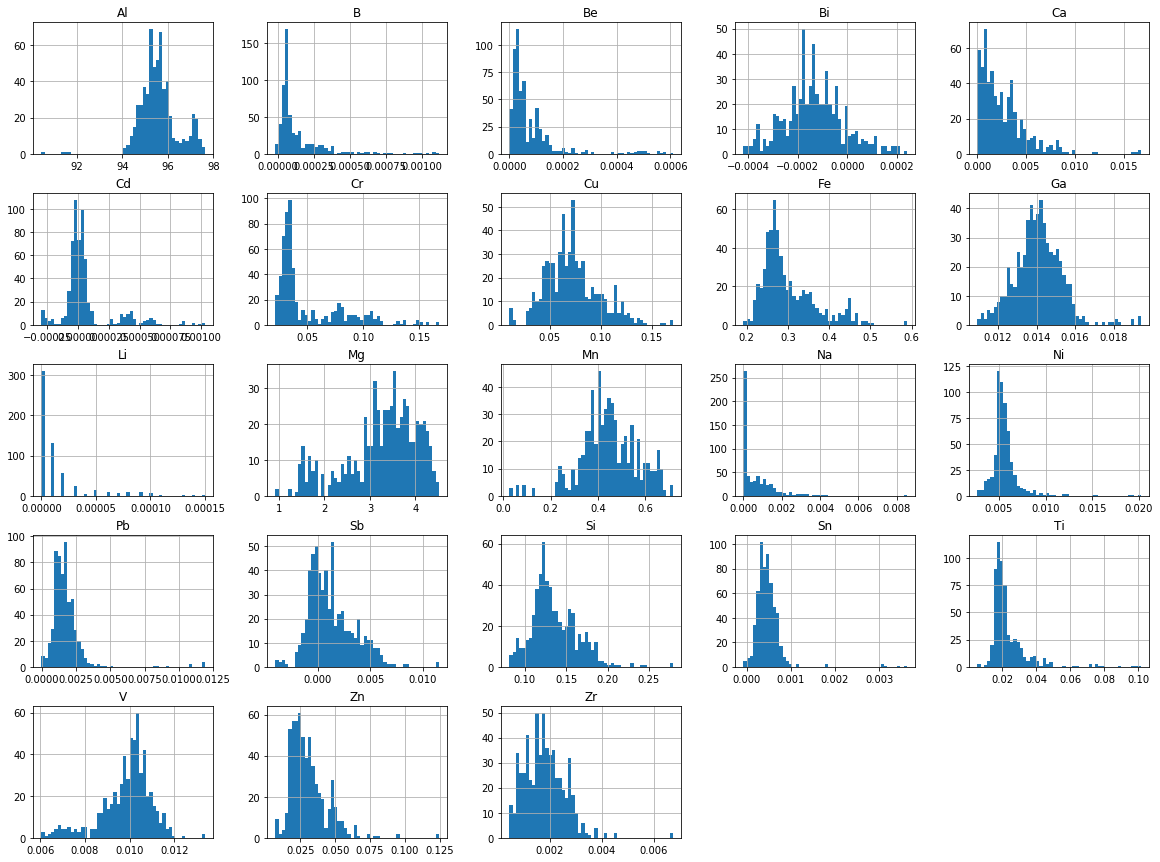

In [69]:
plt.rcParams["figure.figsize"] = (20, 15)

features.hist(bins=50)
plt.show()

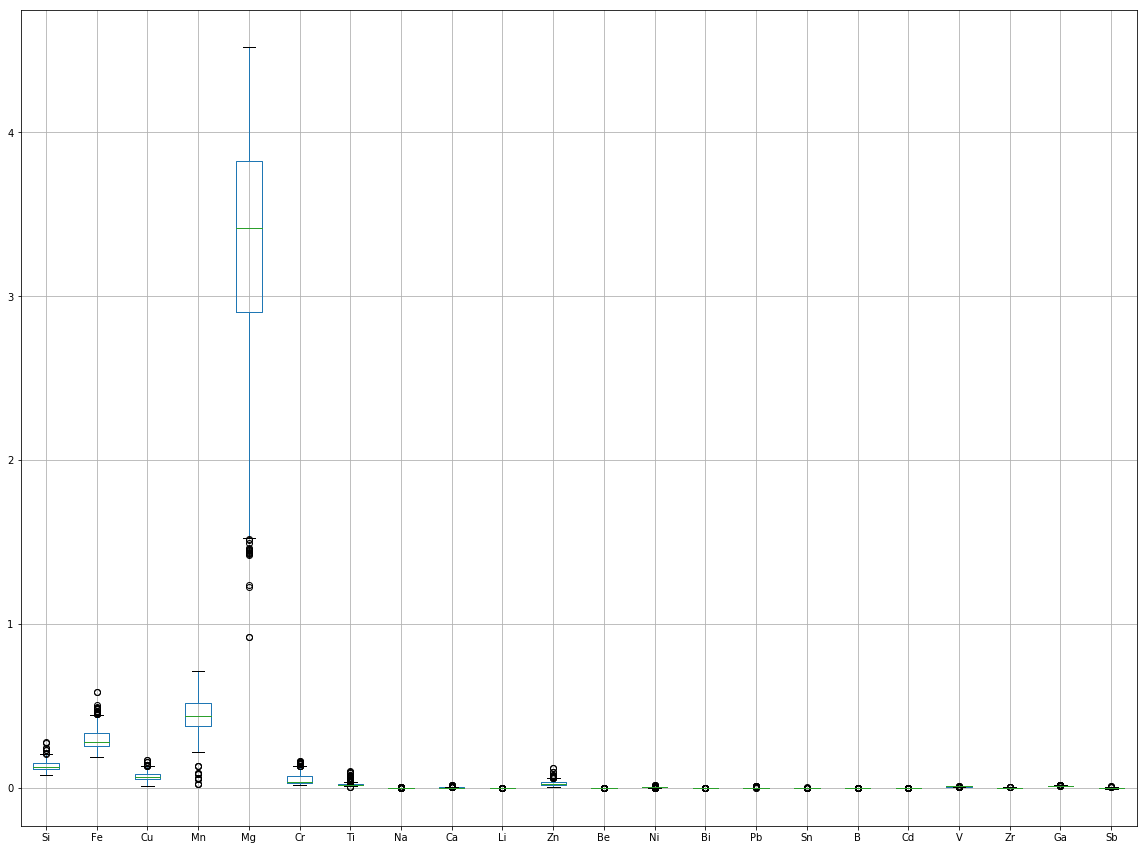

In [70]:
features.drop('Al',1).boxplot()

features와 target 간의 상관도 분석

In [127]:
pre_invest=features
pre_invest['target']=target
#pre_invest.info()

In [128]:
pre_invest

,Si,Fe,Cu,Mn,Mg,Cr,Ti,Na,Ca,Li,...,Al,Pb,Sn,B,Cd,V,Zr,Ga,Sb,target
0,0.10834,0.25197,0.03229,0.22466,2.27050,0.09849,0.01502,0.00001,0.00005,0.00000,...,96.94504,0.00186,0.00042,0.00003,-0.00001,0.00690,0.00111,0.01342,-0.00175,2
1,0.10925,0.25434,0.03250,0.22216,2.27156,0.09666,0.01498,0.00000,0.00005,0.00000,...,96.94466,0.00185,0.00042,0.00002,-0.00001,0.00681,0.00110,0.01352,-0.00152,2
2,0.11497,0.28729,0.03481,0.22543,1.79650,0.09678,0.01793,0.00001,0.00013,0.00000,...,97.36143,0.00291,0.00051,0.00003,-0.00002,0.00735,0.00120,0.01308,-0.00053,2
3,0.11696,0.28613,0.03558,0.22741,1.83005,0.09747,0.01774,0.00001,0.00014,0.00000,...,97.32277,0.00295,0.00053,0.00004,-0.00002,0.00738,0.00118,0.01337,-0.00067,2
4,0.11668,0.28467,0.03550,0.22742,1.82417,0.09662,0.01734,0.00001,0.00013,0.00000,...,97.33218,0.00307,0.00057,0.00002,-0.00001,0.00726,0.00117,0.01337,-0.00075,2
5,0.11602,0.26127,0.05381,0.33708,3.41091,0.06323,0.02033,0.00000,0.00062,0.00000,...,95.68323,0.00118,0.00032,0.00003,0.00002,0.00946,0.00116,0.01411,-0.00056,2
6,0.11444,0.26148,0.05369,0.33938,3.41606,0.06418,0.02094,0.00000,0.00061,0.00000,...,95.67612,0.00110,0.00031,0.00002,0.00003,0.00968,0.00116,0.01394,-0.00089,2
7,0.12222,0.26784,0.04328,0.35613,3.31117,0.06256,0.03306,0.00002,0.00257,0.00000,...,95.75132,0.00101,0.00027,0.00004,0.00002,0.00996,0.00124,0.01340,-0.00037,2
8,0.11705,0.25256,0.04095,0.35041,3.20683,0.06255,0.03473,0.00002,0.00242,0.00000,...,95.88424,0.00085,0.00025,0.00002,0.00002,0.01026,0.00125,0.01281,-0.00065,2
9,0.11832,0.25535,0.04193,0.35059,3.23593,0.06206,0.03381,0.00002,0.00251,0.00000,...,95.85087,0.00084,0.00025,0.00005,0.00003,0.01009,0.00124,0.01300,-0.00054,2


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]), <a list of 24 Text yticklabel objects>)

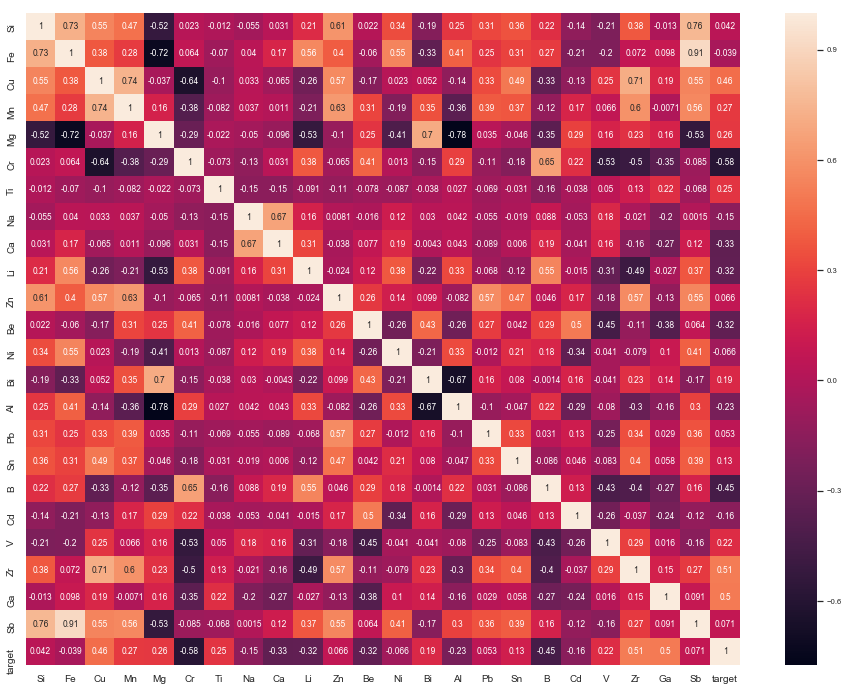

In [129]:
corr = pre_invest.corr(method = 'pearson')


fig = plt.figure(figsize = (16, 12))
sns.set(font_scale=0.7)
sns.heatmap(corr,annot=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

Text(-1.5530000000000008, 0.5, 'Target')

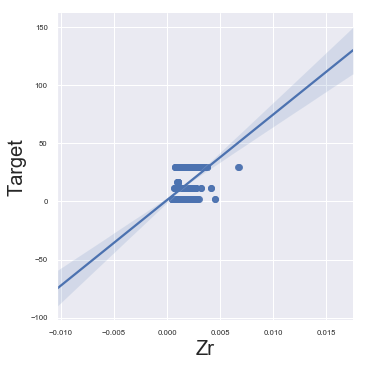

In [130]:
sns.lmplot(x='Zr',y='target',data=pre_invest)
plt.xlabel('Zr',fontsize=20)
plt.ylabel('Target',fontsize=20)

Text(7.321999999999999, 0.5, 'Target')

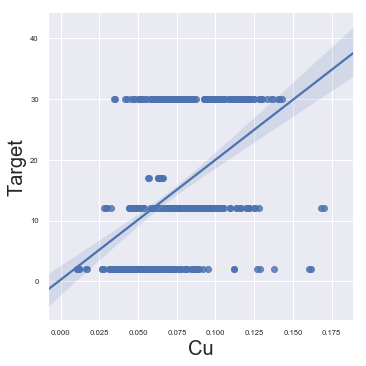

In [131]:
sns.lmplot(x='Cu',y='target',data=pre_invest)
plt.xlabel('Cu',fontsize=20)
plt.ylabel('Target',fontsize=20)

Text(7.321999999999999, 0.5, 'Target')

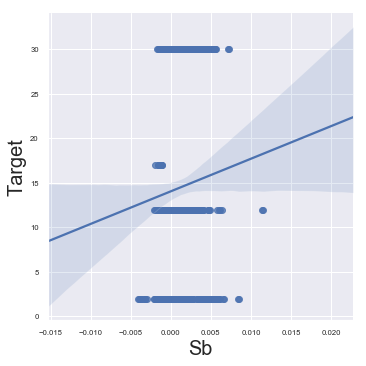

In [132]:
sns.lmplot(x='Sb',y='target',data=pre_invest)
plt.xlabel('Sb',fontsize=20)
plt.ylabel('Target',fontsize=20)